In [3]:
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
%matplotlib inline

In [4]:

consumer_complaints = pd.read_csv('complaints_dec_2014.csv')
consumer_complaints

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
5,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
6,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,12/31/2014,01/07/2015,Amex,Closed with explanation,Yes,NaN
7,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,12/31/2014,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
8,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN
9,1177139,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN


In [5]:
consumer_complaints.groupby('Product').count().head()

,Complaint ID,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Product,,,,,,,,,,,,,
Bank account or service,1136,1136,1136,0,1112,1117,1136,1136,1136,1136,1136,1136,170
Consumer loan,578,578,578,0,575,576,578,578,578,578,578,578,110
Credit card,1100,0,1100,0,1091,1086,1100,1100,1100,1100,1100,1100,205
Credit reporting,2113,0,2113,2113,2022,2090,2113,2113,2113,2113,2113,2113,338
Debt collection,2942,2160,2942,2942,2910,2911,2942,2942,2942,2942,2942,2942,472


In [6]:
complaints_by_product = consumer_complaints.Product.value_counts()

In [7]:
complaints_by_product

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
dtype: int64

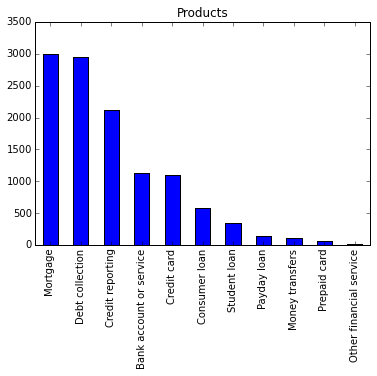

In [8]:
consumer_complaints.Product.value_counts().plot(title = "Products", kind = "bar")
plt.show()

In [9]:
complaints_by_company = consumer_complaints.Company.value_counts()

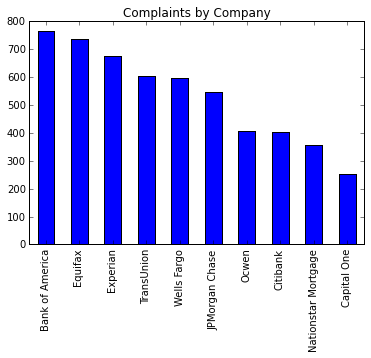

In [10]:
complaints_by_company.head(10).plot(title= "Complaints by Company", kind = "bar")
plt.show()

In [11]:
complaints_by_response = consumer_complaints['Company response'].value_counts()

In [12]:
complaints_by_response

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64

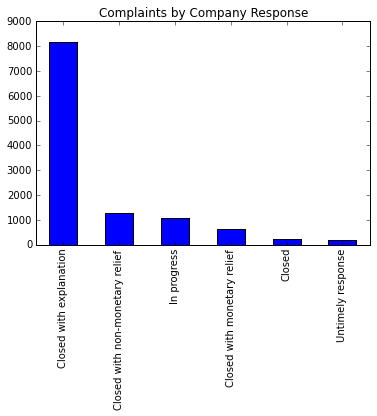

In [13]:
complaints_by_response.plot(title="Complaints by Company Response", kind = "bar")
plt.show()

In [14]:
date_series = consumer_complaints.pop('Date received')


In [47]:
consumer_complaints.index = pd.to_datetime(date_series,format = '%m/%d/%Y')

In [48]:
consumer_complaints

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
2014-12-31,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
2014-12-31,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,01/07/2015,Amex,Closed with explanation,Yes,NaN
2014-12-31,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
2014-12-31,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN


In [49]:
consumer_complaints.index = consumer_complaints.index.weekday

In [50]:
consumer_complaints

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
2,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
2,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
2,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
2,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
2,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
2,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,01/07/2015,Amex,Closed with explanation,Yes,NaN
2,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
2,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN
2,1177139,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN


In [87]:
daily_complaints= consumer_complaints.index.value_counts()

In [88]:
daily_complaints

1    2580
0    2544
2    2289
3    1634
4    1446
5     543
6     507
dtype: int64

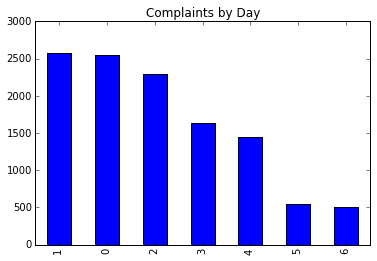

In [97]:
daily_complaints.plot(title = "Complaints by Day", kind = "bar")
plt.show()